### Load Packages

In [1]:
# TODO: add annotations describing usage of different modules

from operator import mod
from os import getcwd
from os.path import exists, join

import joblib
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, KBinsDiscretizer
from sklearn.svm import SVR
import pandas as pd
import numpy as np
# from ydata_profiling import ProfileReport

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
# import xgboost as xgb
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import recall_score

from sklearn import tree
from sklearn.decomposition import PCA, SparsePCA

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import json
import pickle
from IPython.display import Image
import warnings

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

import altair as alt
import random
import warnings

warnings.filterwarnings('ignore')

# set seaborn whitegrid theme
sns.set(style="whitegrid")

from sklearn.inspection import permutation_importance
from random import sample
from itertools import combinations

/Users/orencarmeli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Load Data

In [2]:
cdc_survey = pd.read_csv('../../../data/cdc_nhanes_survey_responses_clean.csv')
print(cdc_survey.shape)

# filter to pregnant moms
cdc_survey_pmom = cdc_survey[cdc_survey['has_been_pregnant'] == 1].reset_index()
print(cdc_survey_pmom.shape)

(35706, 863)
(7741, 864)


### Candidate Features

Here we list out all candidate features for our model. We have separate lists containing each feature themes and one final list that includes all features.

In [106]:
# Depression screener
dep_screener_cols = [
    'little_interest_in_doing_things',
    'feeling_down_depressed_hopeless',
    'trouble_falling_or_staying_asleep',
    'feeling_tired_or_having_little_energy',
    'poor_appetitie_or_overeating',
    'feeling_bad_about_yourself',
    'trouble_concentrating',
    'moving_or_speaking_to_slowly_or_fast',
    'thoughts_you_would_be_better_off_dead',
    'difficult_doing_daytoday_tasks'
]

# Alcohol & smoking
alcohol_n_smoking_cols = [
    'has_smoked_tabacco_last_5days',
    'alcoholic_drinks_past_12mo', 
    'drank_alc',
    'alc_drinking_freq',
    'alc_per_day',
    'times_with_4or5_alc',
    'times_with_8plus_alc',
    'times_with_12plus_alc',
    '4plus_alc_daily',
    'days_4plus_drinks_occasion',
    'smoked_100_cigs',
    'currently_smoke'
]

#Medical Conditions 
med_condition_cols = [
    'chest_discomfort',
    'asthma',
    'anemia_treatment',
    'blood_transfusion',
    'arthritis',
    'heart_failure',
    'coronary_heart_disease',
    'angina_pectoris',
    'heart_attack',
    'stroke',
    'thyroid_issues',
    'respiratory_issues',
    'abdominal_pain',
    'gallstones',
    'gallbladder_surgery',
    'cancer',
    'dr_recommend_lose_weight',
    'dr_recommend_exercise',
    'dr_recommend_reduce_salt',
    'dr_recommend_reduce_fat',
    'currently_losing_weight',
    'currently_increase_exercise',
    'currently_reducing_salt',
    'currently_reducing_fat',
    'metal_objects',
    'has_diabetes',    
    #Blood Pressure & Cholesterol 
    'high_bp',
    'age_hypertension',
    'hypertension_prescription',
    'high_bp_prescription',
    'high_cholesterol',
    'cholesterol_prescription',
    # general health
    'has_overweight_diagnosis',   
    'height_in',
    'weight_lbs', 
    'general_health_condition',      
]

# diet, nutrition, & exercise 
lifestyle_cols = [
    # exercise/weight loss
    'vigorous_work',
    'walk_or_bicycle',
    'vigorous_recreation',
    'moderate_recreation',    
    'count_days_moderate_recreational_activity',   
    'count_minutes_moderate_recreational_activity',
    'count_minutes_moderate_sedentary_activity',    
    'count_lost_10plus_pounds',
    'has_tried_to_lose_weight_12mo', 
    'attempt_weight_loss_1yr',           
    # diet
    'how_healthy_is_your_diet',    
    'milk_consumption_freq',
    'govmnt_meal_delivery',
    'nonhomemade_meals',
    'fastfood_meals',
    'readytoeat_meals',
    'frozen_pizza'   
]

# Reproductive Health 
reproductive_health_cols = [
    'regular_periods',
    'age_last_period',
    'try_pregnancy_1yr',
    'see_dr_fertility',
    'pelvic_infection',
    'pregnant_now',
    'pregnancy_count',
    'diabetes_pregnancy',
    'delivery_count',
    'live_birth_count',
    'age_at_first_birth',
    'age_at_last_birth',
    'months_since_birth',
    'horomones_not_bc'
]

# hospital usage & access to care
hospital_utilization_n_access_cols = [
    'general_health',
    'regular_healthcare_place',
    'time_since_last_healthcare',
    'overnight_in_hospital',
    'seen_mental_health_professional',
    'count_days_seen_doctor_12mo',
#    'duration_last_healthcare_visit',   
    'have_health_insurance',
    'have_private_insurance',
    'has_health_insurance_gap',       
    'plan_cover_prescriptions'    
]

# socioeconomic status
socioeconomic_cols = [
    #Food Security
    'emergency_food_received',
    'food_stamps_used',      
    #Income
    'family_poverty_level',
    'family_poverty_level_category',
    #Occupation
    'hours_worked',
    'over_35_hrs_worked',
    'work_schedule'    
]

demographic_cols = [
    'food_security_level_household',   
    'food_security_level_adult',    
    'monthly_poverty_index_category',
    'monthly_poverty_index',
    'count_hours_worked_last_week',
    'age_in_years',   
    'education_level',
    'is_usa_born'
]

# combine all candidate features
candidate_features = dep_screener_cols + \
    alcohol_n_smoking_cols + \
    med_condition_cols + \
    hospital_utilization_n_access_cols + \
    lifestyle_cols + \
    socioeconomic_cols + \
    reproductive_health_cols + \
    demographic_cols


len(candidate_features)

114

In [107]:
cdc_survey_pmom[
    (cdc_survey_pmom[dep_screener_cols[0]] == 0) & 
    (cdc_survey_pmom[dep_screener_cols[1]] == 0) &
    (cdc_survey_pmom[dep_screener_cols[2]] == 0) &
    (cdc_survey_pmom[dep_screener_cols[3]] == 0) &
    (cdc_survey_pmom[dep_screener_cols[4]] == 0) &
    (cdc_survey_pmom[dep_screener_cols[5]] == 0) &
    (cdc_survey_pmom[dep_screener_cols[6]] == 0) &
    (cdc_survey_pmom[dep_screener_cols[7]] == 0) &    
    (cdc_survey_pmom[dep_screener_cols[8]] == 0) &    
    (cdc_survey_pmom[dep_screener_cols[9]] == 0)     
][dep_screener_cols]

,little_interest_in_doing_things,feeling_down_depressed_hopeless,trouble_falling_or_staying_asleep,feeling_tired_or_having_little_energy,poor_appetitie_or_overeating,feeling_bad_about_yourself,trouble_concentrating,moving_or_speaking_to_slowly_or_fast,thoughts_you_would_be_better_off_dead,difficult_doing_daytoday_tasks


In [108]:
cdc_survey_pmom['num_dep_screener_0'] = (cdc_survey_pmom[dep_screener_cols]==0).sum(axis=1)
cdc_survey_pmom = cdc_survey_pmom[cdc_survey_pmom['num_dep_screener_0'] >= 9]
cdc_survey_pmom.shape

(3347, 866)

In [109]:
cdc_survey_pmom['num_dep_screener_0'].value_counts()

9    3347
Name: num_dep_screener_0, dtype: int64

### Functions

In [110]:
## ###############################################################################
## function to create test & train dataset

def get_model_data(original_df, 
                   columns, 
                   test_size_to_use=0.2,
                   drop_null_rows=False,
                   null_imputer_strategy='median', # mean, median, most_frequent
                   use_value_scaler=True,
                   use_smote=False,
                   return_indices=False):
    """
    Function to build feature & indicator matrices for both train & test.
    """
    
    # add target column (MDD)
    cols_to_use = columns.copy()
    cols_to_use.insert(0, 'MDD')
    #cols_to_use.insert(0, 'SEQN')
    
    df_to_use = original_df[cols_to_use]
    
    if drop_null_rows:
        df_to_use.dropna(inplace=True)
    
    # Create test & train data
    x = df_to_use.iloc[:,1:].values
    y = df_to_use['MDD'].values
    indices = np.arange(y.shape[0])
    
    if not drop_null_rows:
        # SimpleImputer() = fill in missing values
        # note imputer may drop columns if no values exist for it
        imputer = SimpleImputer(strategy=null_imputer_strategy)  
        x = imputer.fit_transform(x)

    # RobustScaler() = scale features to remove outliers
    if use_value_scaler:
        trans = RobustScaler()
        x = trans.fit_transform(x)

    x_train, x_test, y_train, y_test, idx_train, idx_test = train_test_split(
        x, 
        y, 
        indices,
        test_size=test_size_to_use, 
        random_state=42
    ) 
    
    # Technique to de-risk from positive class imbalance
    if use_smote:
        sm = SMOTE(random_state=42)
        x_train, y_train = sm.fit_resample(x_train, y_train)
    
    if return_indices:
        return x_train, x_test, y_train, y_test, idx_train, idx_test
    else:
        return x_train, x_test, y_train, y_test

## ###############################################################################
## Function to get performance across different models

def get_performance_df(label_actual, label_pred, model_name):
    """
    Function to calculate performance metrics for model.
    Includes precision, recal, F1, & support.
    """
    # create classification report
    result_table = classification_report(label_actual, label_pred, output_dict=True)
    result_table = pd.DataFrame.from_dict(result_table)

    # store for later
    accuracies = result_table['accuracy'][0]
    
    column_key = {
        '0':'Depressed (No)',
         '1':'Depressed (Yes)',
         'accuracy':'accuracy',
         'macro avg':'Macro Avg',
         'weighted avg':'Weighted Avg'
    }

    # rename grouping
    result_table.columns = [column_key.get(key) for key in result_table.columns]

    # create dataframe with 1 row per grouping
    result_table.drop(labels = 'accuracy', axis = 1, inplace=True)
    result_table = result_table.transpose()
    result_table['accuracy'] = [accuracies for i in range(result_table.shape[0])]
    result_table = result_table.reset_index()
    result_table.rename(columns = {'index':'grouping'},inplace=True)
    result_table['model'] = model_name
    result_table = result_table[['model','grouping','precision','recall','f1-score','support','accuracy']]
    return result_table

def generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test):
    """
    Function that trains and makes predictions using 5 of the classifiers went over during the class.
    Meant as a helper function for easier testing of different modeling pipelines.
    """

    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    # test
    pred_labels_knn  = knn.predict(x_test)
    score_knn = get_performance_df(y_test, pred_labels_knn,'Knn')
    # train
    pred_labels_knn_train  = knn.predict(x_train)
    score_knn_train = get_performance_df(y_train, pred_labels_knn_train,'Knn')
    
    # Logistic Regression
    lm = LogisticRegression()
    lm.fit(x_train, y_train)
    # test 
    pred_labels_lr  = lm.predict(x_test)
    score_lr = get_performance_df(y_test, pred_labels_lr,'Logistic Regression')
    # train 
    pred_labels_lr_train  = lm.predict(x_train)
    score_lr_train = get_performance_df(y_train, pred_labels_lr_train,'Logistic Regression')    
        
    # Bernoulii Naive Bayes
    bnb = BernoulliNB()
    bnb.fit(x_train, y_train)
    # test 
    pred_labels_bnb  = bnb.predict(x_test)
    score_bnb = get_performance_df(y_test, pred_labels_bnb,'Bernoulli Naive Bayes')    
    # train 
    pred_labels_bnb_train  = bnb.predict(x_train)
    score_bnb_train = get_performance_df(y_train, pred_labels_bnb_train,'Bernoulli Naive Bayes')       
        
    # Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    # test 
    pred_labels_gnb  = gnb.predict(x_test)
    score_gnb = get_performance_df(y_test, pred_labels_gnb,'Gaussian Naive Bayes')  
    # train 
    pred_labels_gnb_train  = gnb.predict(x_train)
    score_gnb_train = get_performance_df(y_train, pred_labels_gnb_train,'Gaussian Naive Bayes')         

    # Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
    # test     
    pred_labels_rf  = rf.predict(x_test)
    score_rf = get_performance_df(y_test, pred_labels_rf,'Random Forest')   
    # train 
    pred_labels_rf_train  = rf.predict(x_train)
    score_rf_train = get_performance_df(y_train, pred_labels_rf_train,'Random Forest')         
    
    #Decision Tree
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(x_train, y_train)
    # test
    pred_labels_dt = dt.predict(x_test)
    score_dt = get_performance_df(y_test, pred_labels_dt,'Decision Tree')
    # train 
    pred_labels_dt_train  = dt.predict(x_train)
    score_dt_train = get_performance_df(y_train, pred_labels_dt_train,'Decision Tree')          

    #Gradient Boosting Classifier
    gb = GradientBoostingClassifier()
    gb.fit(x_train, y_train)
    # test 
    pred_labels_gb = gb.predict(x_test)
    score_gb = get_performance_df(y_test, pred_labels_gb,'Gradient Boosting Classifier')
    # train 
    pred_labels_gb_train  = gb.predict(x_train)
    score_gb_train = get_performance_df(y_train, pred_labels_gb_train,'Gradient Boosting Classifier')     
    
    # make dataframe with scores (on test data)
    scores_test = pd.concat(
        [score_knn, 
         score_lr, 
         score_bnb, 
         score_gnb, 
         score_rf, 
         score_dt, 
         score_gb]
    )
    scores_test = scores_test.sort_values(by = 'recall', ascending=False)
    
    # make dataframe with scores (on train data)
    scores_train = pd.concat(
        [score_knn_train, 
         score_lr_train, 
         score_bnb_train, 
         score_gnb_train, 
         score_rf_train, 
         score_dt_train, 
         score_gb_train]
    )
    scores_train = scores_train.sort_values(by = 'recall', ascending=False)    
        
    # make dataframe with predictions
    predictions = pd.DataFrame({
        'actuals':y_test,
        'pred_knn':pred_labels_knn,
        'pred_logistic_regression':pred_labels_lr,
        'pred_bernoulli_naive_bayes':pred_labels_bnb,
        'pred_gaussian_naive_bayes':pred_labels_gnb,
        'pred_random_forest':pred_labels_rf,
        'pred_decision_tree':pred_labels_dt,
        'pred_gradient_boosting_classifier':pred_labels_gb
    })

    return scores_test, predictions, scores_train

## ###############################################################################
## Functions for Error analysis

def plot_confusion_matrix(y_test, pred_labels):
    """
    Function that displays a confusion matrix for provided true and predicted classes
    """
    #print(f'cover type 1 and type 2 total correct {np.sum(np.diag(metrics.confusion_matrix(y_test, pred_labels))[:2])}')

    cm = confusion_matrix(y_test, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(5,5))
    disp = disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')    
    plt.grid(False)
    plt.show()
    return

def label_pred(row):
    """
    Function that labels prediction cases into TP, TN, FP, FN
    """
    if row['y_actual'] == row['y_pred']:
        if row['y_actual'] == 1:
            result = 'TP'
        else:
            result = 'TN'
    else: 
        if row['y_actual'] == 1:
            result = 'FN'
        else:
            result = 'FP'

    return result

def get_error_data(
    y_actuals, 
    y_predictions,
    columns_to_get,
    original_df,
    idx_test):
    """
    Function that creates a clean dataset to perform error analysis on test observations.
    """    
    
    # create dataframe with actuals & predictions w/ labels
    prediction_labels = pd.DataFrame(columns = ['y_actual','y_pred'])
    prediction_labels['y_actual'] = y_actuals
    prediction_labels['y_pred'] = y_predictions
    prediction_labels['label'] = prediction_labels.apply(label_pred, axis = 1)

    feature_df = original_df.iloc[idx_test][columns_to_get].reset_index()

    # combine into 1
    pred_data = pd.concat([prediction_labels, feature_df], axis = 1)
    
    return pred_data

def create_error_plots(
    prediction_data,
    columns_to_plot,
    show_bar_plot=True,
    show_density_plot=False):
    """
    Function that creates bi-variate plots comparing TP, TN, FP, FN for each desired feature column.
    """

    ### Bi-variate plots
    for column in columns_to_plot:
    
        if show_density_plot:
            ## Density plot
            sns.kdeplot(
                data=prediction_data, 
                x=column, 
                hue="label", 
                cut=0, 
                common_norm=False, 
                alpha=0.4
            )

        if show_bar_plot:
            ## barplot
            # create % of total column by group
            group_data = prediction_data.groupby(['label',column])['y_actual'].count().reset_index()
            group_data['Pct of Total'] = group_data['y_actual'] / group_data.groupby('label')['y_actual'].transform('sum')

            sns.catplot(
                data=group_data, 
                kind="bar",
                x=column, 
                y="Pct of Total", 
                hue="label",
                alpha = 0.8
            )

        plt.show()

# 1) Exploratory Data Analyais

We spent the first few weeks exploring our data. We have a folder of our EDA [here](https://github.com/orenscarmeli/capstone210-ppd-carmeli_chari_hand_lee/tree/main/eda), but we highlight the key findings in this section.

The key aspects we looked at include;
- Data coverage based on what % of values are null across each feature. Our classifiers do not allow null values to be used, hence we'll either need to drop null values or impute values for these.
- Feature correlation based on a features correlation to the target column (MDD). 
- Feature sparsity by measuring whether a variable has a large range of values versus a few discrete options. This will come into play when we explore feature engineering.

We first measured the % of observation that are within the positive class.

In [8]:
#print(f"Across the entire dataset {round(cdc_survey['MDD'].mean()*100,2)}% of observations are within the positive class")
print(f"Among females that have been pregnant {round(cdc_survey_pmom['MDD'].mean()*100,2)}% of observations are within the positive class")

Among females that have been pregnant 3.62% of observations are within the positive class


We defined a function to perform a univariate analysis per feature. This creates a dataframe that has 1 row per feature & stores key stats for it.

The primary columns include;
- **corr** = the pearson correlation between a feature & target (MDD)
- **corr_abs** = the absolute value of the corr column
- **unique_values** = # of discrete values within a features domain
- **pct_null** = % of values that are null

In addition, for every feature we calculate the % of observations where MDD=1 by each discrete value in its domain. We then compare the min, max, & std deviation across value averages. For example, feeling_down_depressed_hopeless has 4 values {0,1,2,3} per the chart below;

In [9]:
cdc_survey_pmom.groupby('feeling_down_depressed_hopeless') \
   .agg({'MDD':'mean', 'SEQN':'count'}) \
   .reset_index() \
   .rename(columns={'MDD':'pct_MDD','SEQN':'num_responses'})

,feeling_down_depressed_hopeless,pct_MDD,num_responses
0,0.0,0.035018,3284
1,1.0,0.094340,53
2,2.0,0.111111,9
3,3.0,0.000000,1


In [10]:
cdc_survey_pmom[dep_screener_cols].sum()

little_interest_in_doing_things          178.0
feeling_down_depressed_hopeless           74.0
trouble_falling_or_staying_asleep        410.0
feeling_tired_or_having_little_energy    772.0
poor_appetitie_or_overeating             160.0
feeling_bad_about_yourself                36.0
trouble_concentrating                     76.0
moving_or_speaking_to_slowly_or_fast      12.0
thoughts_you_would_be_better_off_dead      0.0
difficult_doing_daytoday_tasks             0.0
dtype: float64

Per the image above, the min and max are 0.05 & 0.35 respectively. We then calculate a value that is max_minus_min to see clearly how well this feature separates negative & postive class observations. We filter for values that have 30+ responses to reduce noise from sparse features.

These columns are plotted in the univariate analysis as;
- **min** = min pct_target across values with 30+ responses
- **max** = max pct_target across values with 30+ responses
- **std** = std deviation pct_target across values with 30+ responses
- **max_minus_min** = max - min columns.

In [11]:
def univariate_analysis(
    df_to_use = cdc_survey_pmom,
    columns = dep_screener_cols,
    target_col = 'MDD',
    show_plot=False):
    
    column_values = pd.DataFrame(columns = ['col_value','pct_target','num_responses','feature'])
    column_summary = pd.DataFrame(columns=['feature','corr','corr_abs','std','min','max','unique_values','target','max_minus_min'])

    # MDD coverage by feature
    for col in columns:

        # calc mean pct for target column by indicator variable
        univariate = df_to_use.groupby(col) \
               .agg({target_col:'mean', 'SEQN':'count'}) \
               .reset_index() \
               .rename(columns={col:'col_value',target_col:'pct_target','SEQN':'num_responses'})

        if show_plot:
            print(f"\n{col}\n")
            print(univariate)
        
        # aggregate into summary table
        column_traits = pd.DataFrame({
            'feature':[col],
            'corr':[df_to_use[['MDD',col]].corr().iloc[1,0]],
            'corr_abs':[abs(df_to_use[['MDD',col]].corr().iloc[1,0])],            
            'std':[univariate[univariate['num_responses'] >= 30]['pct_target'].std()],
            'min':[univariate[univariate['num_responses'] >= 30]['pct_target'].min()],
            'max':[univariate[univariate['num_responses'] >= 30]['pct_target'].max()],
            'unique_values':[univariate.shape[0]],
            'target':[target_col]
        })
        column_traits['max_minus_min'] = column_traits['max'] - column_traits['min']
        column_summary = pd.concat([column_summary,column_traits])
        
        # univariate data
        univariate['feature'] = col
        column_values = pd.concat([column_values,univariate])
        
    return column_summary, column_values

The cell block below creates a summary table showing the totals per feature. The final column we add is **feature theme** which groups the features into their respective themes. We display the top 20 features based on the corr_abs column.

In [112]:
## ##########################
## Calculate null value percent by feature

null_value_tot = pd.DataFrame(
    cdc_survey_pmom[candidate_features].isna().sum())\
    .rename(columns={0:'num_nulls'}
).reset_index()
null_value_tot['pct_null'] = null_value_tot['num_nulls'] / cdc_survey_pmom.shape[0]
null_value_tot.rename(columns={'index':'feature'},inplace=True)

## ##########################
## Univariate per feature 

univariate_stats, univariate_values = univariate_analysis(columns=candidate_features)

## ##########################
## merge

univariate_summary = univariate_stats.merge(null_value_tot, left_on='feature', right_on='feature', how = 'left')
univariate_summary = univariate_summary.sort_values(by = 'corr_abs', ascending=False)

## ##########################
## create theme column

def create_theme_col(value):
    if value in dep_screener_cols:
        return 'dep_screener'
    elif value in alcohol_n_smoking_cols:
        return 'alcohol_n_smoking'
    elif value in med_condition_cols:
        return 'med_condition'
    elif value in lifestyle_cols:
        return 'lifestyle'
    elif value in hospital_utilization_n_access_cols:
        return 'hospital_utilization_n_access'
    elif value in socioeconomic_cols:
        return 'socioeconomic'
    elif value in reproductive_health_cols:
        return 'reproductive_health'
    elif value in demographic_cols:
        return 'demographic'     
    
univariate_summary['feature_theme'] = univariate_summary['feature'].map(create_theme_col)    

cols = ['feature','corr','corr_abs','unique_values','pct_null','max_minus_min','min','max','std','feature_theme']
univariate_summary[cols].iloc[:20,:]

,feature,corr,corr_abs,unique_values,pct_null,max_minus_min,min,max,std,feature_theme
17,times_with_12plus_alc,-0.148559,0.148559,8,0.985659,0.000000,0.088235,0.088235,NaN,alcohol_n_smoking
62,seen_mental_health_professional,-0.145780,0.145780,2,0.000299,0.137344,0.030539,0.167883,0.097117,hospital_utilization_n_access
63,count_days_seen_doctor_12mo,0.132099,0.132099,11,0.908874,0.067797,0.000000,0.067797,0.038106,hospital_utilization_n_access
75,count_lost_10plus_pounds,0.113423,0.113423,4,0.580221,0.087602,0.029639,0.117241,0.041852,lifestyle
26,arthritis,-0.112665,0.112665,2,0.003287,0.047073,0.023102,0.070175,0.033286,med_condition
105,horomones_not_bc,-0.112026,0.112026,2,0.003884,0.055516,0.026335,0.081851,0.039256,reproductive_health
113,is_usa_born,0.100130,0.100130,2,0.000598,0.039617,0.009821,0.049438,0.028013,demographic
16,times_with_8plus_alc,0.096997,0.096997,9,0.914252,0.000000,0.020921,0.020921,NaN,alcohol_n_smoking
60,time_since_last_healthcare,-0.095592,0.095592,5,0.952794,0.028571,0.000000,0.028571,0.016496,hospital_utilization_n_access
91,work_schedule,0.093788,0.093788,4,0.756200,0.041670,0.011765,0.053435,0.018668,socioeconomic


In [13]:
#univariate_summary[univariate_summary['feature'].isin(dep_screener_cols)]

In [14]:
Counter(univariate_summary[cols].iloc[:20,:]['feature_theme'])

Counter({'alcohol_n_smoking': 3,
         'hospital_utilization_n_access': 4,
         'lifestyle': 2,
         'med_condition': 5,
         'reproductive_health': 2,
         'demographic': 2,
         'socioeconomic': 2})

In [15]:
univariate_summary.shape

(115, 12)

The strongest features have a moderate signal with the strongest correlation strength being approx 0.3. Here we also see that the depression screener theme is the most prevalent of the top 20. We subsequently calculate the average by theme.

In [16]:
univariate_summary[cols].groupby('feature_theme') \
    .mean() \
    .reset_index() \
    .sort_values(by = 'corr_abs', ascending=False)

,feature_theme,corr,corr_abs,pct_null,max_minus_min,min,max,std
3,hospital_utilization_n_access,-0.035304,0.063891,0.353994,0.033942,0.018322,0.052263,0.024165
7,socioeconomic,0.004039,0.046930,0.341628,0.038330,0.021597,0.059927,0.017977
0,alcohol_n_smoking,-0.015531,0.043355,0.540808,0.032610,0.024728,0.057338,0.017482
5,med_condition,-0.022111,0.038315,0.265321,0.028488,0.029420,0.057908,0.016509
6,reproductive_health,-0.015202,0.036015,0.308186,0.044635,0.012666,0.057301,0.017799
1,demographic,0.020803,0.034448,0.101584,0.046101,0.016983,0.063084,0.016749
4,lifestyle,0.014052,0.027791,0.265611,0.046341,0.021046,0.067387,0.017804
2,dep_screener,0.005027,0.013986,0.060741,0.026853,0.028693,0.055546,0.026547


In [17]:
univariate_summary[cols].groupby('feature_theme')['feature'] \
    .count() \
    .reset_index()

,feature_theme,feature
0,alcohol_n_smoking,12
1,demographic,8
2,dep_screener,10
3,hospital_utilization_n_access,11
4,lifestyle,17
5,med_condition,36
6,reproductive_health,14
7,socioeconomic,7


**Key Learnings From EDA**
- The strongest features have a moderate signal with the strongest correlation strength being approx 0.3.
- Top 3 feature themes are depression screener, hospitalization utilization & access, & medical conditions. This makes logical sense as the depression screener is designed to evaluate depression. The hospitalization utilization also make sense where the top feature is "seen_mental_health_professional" which we'd expect to be correlated to an individual taking medication for depression.
- Outside of the depression screener theme the other features have between 10-50% null value exposure. 

# 2) Generate Baseline Models

We start by building baseline models across the 6 classifiers. We start by using the 10 questions from the depression screener questionaire.

In [113]:
baseline_cols = list(univariate_summary['feature'])[:10]
baseline_cols

['times_with_12plus_alc',
 'seen_mental_health_professional',
 'count_days_seen_doctor_12mo',
 'count_lost_10plus_pounds',
 'arthritis',
 'horomones_not_bc',
 'is_usa_born',
 'times_with_8plus_alc',
 'time_since_last_healthcare',
 'work_schedule']

In [114]:
x_train, x_test, y_train, y_test, idx_train, idx_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = baseline_cols,
    return_indices = True
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

perf_test_baseline, predictions, perf_train_baseline = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

(2677, 10)
(670, 10)
(2677,)
(670,)


The baseline models use an 80:20 split ratio. The sizes of our training and test datasets are 6.2k & 1.5k records respectively.

In [20]:
perf_test_baseline_weight = perf_test_baseline[perf_test_baseline['grouping'] == 'Weighted Avg']
perf_test_baseline_weight[['model','recall','f1-score','precision','accuracy']]

,model,recall,f1-score,precision,accuracy
3,Bernoulli Naive Bayes,0.955224,0.933349,0.912453,0.955224
3,Decision Tree,0.955224,0.938549,0.937452,0.955224
3,Gradient Boosting Classifier,0.955224,0.938549,0.937452,0.955224
3,Logistic Regression,0.955224,0.933349,0.912453,0.955224
3,Knn,0.955224,0.933349,0.912453,0.955224
3,Random Forest,0.953731,0.935281,0.928618,0.953731
3,Gaussian Naive Bayes,0.074627,0.061843,0.957290,0.074627


The data above shows the weighted average performance across our 7 classifiers. The performance is quite good when measuring the weighted average. However, given the positive class imbalance where approx 4% of observations are within the positive class, these can be slightly misleading. That being said the industry baseline using the Edinburgh Postnatal Depression Scale (EPDS) is about 85% recall & precision ([source](https://pubmed.ncbi.nlm.nih.gov/33177069/#:~:text=Among%20studies%20with%20a%20semi,off%20value%20of%2011%20or)).

**TODO: Validate whether the baseline is based on weighted or macro avg**

In [115]:
perf_test_baseline_macro = perf_test_baseline[perf_test_baseline['grouping'] == 'Macro Avg']
perf_test_baseline_macro[['model','recall','f1-score','precision','accuracy']]

,model,recall,f1-score,precision,accuracy
2,Gaussian Naive Bayes,0.606250,0.228449,0.528090,0.247761
2,Gradient Boosting Classifier,0.531771,0.547338,0.728979,0.955224
2,Decision Tree,0.530990,0.545265,0.678947,0.953731
2,Random Forest,0.530990,0.545265,0.678947,0.953731
2,Bernoulli Naive Bayes,0.500000,0.488550,0.477612,0.955224
2,Logistic Regression,0.500000,0.488550,0.477612,0.955224
2,Knn,0.500000,0.488550,0.477612,0.955224


In [116]:
perf_test_baseline_macro = perf_test_baseline[perf_test_baseline['grouping'] == 'Depressed (Yes)']
perf_test_baseline_macro[['model','recall','f1-score','precision','accuracy']]

,model,recall,f1-score,precision,accuracy
1,Gaussian Naive Bayes,1.000000,0.106383,0.05618,0.247761
1,Random Forest,0.066667,0.114286,0.40000,0.953731
1,Decision Tree,0.066667,0.114286,0.40000,0.953731
1,Gradient Boosting Classifier,0.066667,0.117647,0.50000,0.955224
1,Logistic Regression,0.000000,0.000000,0.00000,0.955224
1,Knn,0.000000,0.000000,0.00000,0.955224
1,Bernoulli Naive Bayes,0.000000,0.000000,0.00000,0.955224


In [27]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = baseline_cols
)

rus = RandomUnderSampler(
    random_state=42, 
    sampling_strategy=0.04,
    replacement=False
)
x_rus, y_rus = rus.fit_resample(x_train,y_train)
print(len(y_train))
print(Counter(y_train))
print(np.mean(y_train))
print(len(y_rus))
print(Counter(y_rus))
print(np.mean(y_rus))

2677
Counter({0: 2586, 1: 91})
0.033993276055285765
2366
Counter({0: 2275, 1: 91})
0.038461538461538464


In [25]:
perf_test_baseline_v2 = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'sampling_strategy'
])


sampling_strategies = list(np.linspace(0.04,1,num=50))
sampling_strategies.append('baseline')

x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = baseline_cols
)

for sampling_strategy in sampling_strategies:

    if sampling_strategy == 'baseline':
        perf_test_v2, predictions, perf_train_v2 = generate_models(
            x_train, 
            y_train, 
            x_test, 
            y_test
        )
        y_train_prop = np.mean(y_train)
    else:
        rus = RandomUnderSampler(
            random_state=42, 
            sampling_strategy=sampling_strategy,
            replacement=False
        )
        x_rus, y_rus = rus.fit_resample(x_train,y_train)
        perf_test_v2, predictions, perf_train_v2 = generate_models(
            x_rus, 
            y_rus, 
            x_test, 
            y_test
        )
        y_train_prop = np.mean(y_rus)
    
    perf_test_v2['sampling_strategy'] = sampling_strategy
    perf_test_v2['y_train_prop'] = y_train_prop
    perf_test_baseline_v2 = pd.concat([perf_test_baseline_v2,perf_test_v2])

In [26]:
alt.Chart(perf_test_baseline_v2).mark_line(
   point={
     "filled": False,
     "fill": "white"
   }
).encode(
    x = alt.X('y_train_prop', title='Pct Obs MDD=1 In Train Dataset'),
    y = alt.Y('f1-score', scale=alt.Scale(domain=[0, 1])),
    color='model:N',
).facet(
    facet=alt.Facet('grouping')
)

alt.FacetChart(...)

In [28]:
perf_test_baseline_v2.groupby(['sampling_strategy','y_train_prop']).count().reset_index().iloc[:10,:]

,sampling_strategy,y_train_prop,model,grouping,precision,recall,f1-score,support,accuracy
0,0.04,0.038462,28,28,28,28,28,28,28
1,0.059592,0.056242,28,28,28,28,28,28,28
2,0.079184,0.073387,28,28,28,28,28,28,28
3,0.098776,0.089921,28,28,28,28,28,28,28
4,0.118367,0.105937,28,28,28,28,28,28,28
5,0.137959,0.121333,28,28,28,28,28,28,28
6,0.157551,0.136228,28,28,28,28,28,28,28
7,0.177143,0.150662,28,28,28,28,28,28,28
8,0.196735,0.164557,28,28,28,28,28,28,28
9,0.216327,0.178082,28,28,28,28,28,28,28


In [120]:
# rus = RandomUnderSampler(
#     random_state=42, 
#     sampling_strategy=0.118367,
#     replacement=False
# )
# x_rus, y_rus = rus.fit_resample(x_train,y_train)
# np.mean(y_rus)

baseline_cols

['times_with_12plus_alc',
 'seen_mental_health_professional',
 'count_days_seen_doctor_12mo',
 'count_lost_10plus_pounds',
 'arthritis',
 'horomones_not_bc',
 'is_usa_born',
 'times_with_8plus_alc',
 'time_since_last_healthcare',
 'work_schedule']

In [117]:
x_train, x_test, y_train, y_test, idx_train, idx_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = baseline_cols,
    return_indices = True
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

rus = RandomUnderSampler(
    random_state=42, 
    sampling_strategy=0.12,
    replacement=False
)
x_rus, y_rus = rus.fit_resample(x_train,y_train)

print(len(y_rus))
print(Counter(y_rus))
print(np.mean(y_rus))

perf_test_baseline_v2, predictions, perf_train_baseline_v2 = generate_models(
    x_rus, 
    y_rus, 
    x_test, 
    y_test
)
perf_test_baseline_v2.sort_values(by='f1-score', inplace=True, ascending=False)

perf_test_baseline_v2_macro = perf_test_baseline_v2[perf_test_baseline_v2['grouping'] == 'Macro Avg']
perf_test_baseline_v2_macro[['model','recall','f1-score','precision','accuracy']]

(2677, 10)
(670, 10)
(2677,)
(670,)
849
Counter({0: 758, 1: 91})
0.1071849234393404


,model,recall,f1-score,precision,accuracy
2,Random Forest,0.605729,0.622903,0.648947,0.944776
2,Gradient Boosting Classifier,0.600260,0.603529,0.607087,0.934328
2,Decision Tree,0.585156,0.592359,0.601395,0.935821
2,Logistic Regression,0.528646,0.539575,0.603852,0.949254
2,Bernoulli Naive Bayes,0.499219,0.488159,0.477578,0.953731
2,Knn,0.498437,0.487768,0.477545,0.952239
2,Gaussian Naive Bayes,0.515625,0.074421,0.523077,0.074627


In [118]:
perf_test_baseline_v2_macro = perf_test_baseline_v2[perf_test_baseline_v2['grouping'] == 'Depressed (Yes)']
perf_test_baseline_v2_macro[['model','recall','f1-score','precision','accuracy']]

,model,recall,f1-score,precision,accuracy
1,Random Forest,0.233333,0.274510,0.333333,0.944776
1,Gradient Boosting Classifier,0.233333,0.241379,0.250000,0.934328
1,Decision Tree,0.200000,0.218182,0.240000,0.935821
1,Logistic Regression,0.066667,0.105263,0.250000,0.949254
1,Gaussian Naive Bayes,1.000000,0.088235,0.046154,0.074627
1,Knn,0.000000,0.000000,0.000000,0.952239
1,Bernoulli Naive Bayes,0.000000,0.000000,0.000000,0.953731


In [119]:
perf_test_baseline_v2_macro = perf_test_baseline_v2[perf_test_baseline_v2['grouping'] == 'Depressed (No)']
perf_test_baseline_v2_macro[['model','recall','f1-score','precision','accuracy']]

,model,recall,f1-score,precision,accuracy
0,Bernoulli Naive Bayes,0.998437,0.976318,0.955157,0.953731
0,Knn,0.996875,0.975535,0.955090,0.952239
0,Logistic Regression,0.990625,0.973886,0.957704,0.949254
0,Random Forest,0.978125,0.971296,0.964561,0.944776
0,Decision Tree,0.970313,0.966537,0.962791,0.935821
0,Gradient Boosting Classifier,0.967187,0.965679,0.964174,0.934328
0,Gaussian Naive Bayes,0.031250,0.060606,1.000000,0.074627


In [33]:
perf_test_baseline_v2[perf_test_baseline_v2['model'] == 'Random Forest'].sort_values(by='grouping')

,model,grouping,precision,recall,f1-score,support,accuracy
0,Random Forest,Depressed (No),0.963303,0.984375,0.973725,640.0,0.949254
1,Random Forest,Depressed (Yes),0.375000,0.200000,0.260870,30.0,0.949254
2,Random Forest,Macro Avg,0.669151,0.592187,0.617297,670.0,0.949254
3,Random Forest,Weighted Avg,0.936961,0.949254,0.941806,670.0,0.949254


In [34]:
def get_model_data_v2(original_df, 
                   columns, 
                   test_size_to_use=0.2,
                   drop_null_rows=False,
                   null_imputer_strategy='median', # mean, median, most_frequent
                   use_value_scaler=True,
                   return_indices=False,
                   random_under_sample=True):
    """
    Function to build feature & indicator matrices for both train & test.
    """
    
    # add target column (MDD)
    cols_to_use = columns.copy()
    cols_to_use.insert(0, 'MDD')
    #cols_to_use.insert(0, 'SEQN')
    
    df_to_use = original_df[cols_to_use]
    
    if drop_null_rows:
        df_to_use.dropna(inplace=True)
    
    # Create test & train data
    x = df_to_use.iloc[:,1:].values
    y = df_to_use['MDD'].values
    indices = np.arange(y.shape[0])
    
    if not drop_null_rows:
        # SimpleImputer() = fill in missing values
        # note imputer may drop columns if no values exist for it
        imputer = SimpleImputer(strategy=null_imputer_strategy)  
        x = imputer.fit_transform(x)

    # RobustScaler() = scale features to remove outliers
    if use_value_scaler:
        trans = RobustScaler()
        x = trans.fit_transform(x)

    x_train, x_test, y_train, y_test, idx_train, idx_test = train_test_split(
        x, 
        y, 
        indices,
        test_size=test_size_to_use, 
        random_state=42
    ) 
    
    # Technique to de-risk from positive class imbalance
    if random_under_sample:
        rus = RandomUnderSampler(
            random_state=42, 
            sampling_strategy=0.12,
            replacement=False
        )
        x_train, y_train = rus.fit_resample(x_train,y_train)
    
    if return_indices:
        return x_train, x_test, y_train, y_test, idx_train, idx_test
    else:
        return x_train, x_test, y_train, y_test

In [35]:
x_train, x_test, y_train, y_test, idx_train, idx_test = get_model_data_v2(
    original_df = cdc_survey_pmom,
    columns = baseline_cols,
    return_indices = True
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

perf_test_baseline, predictions, perf_train_baseline = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

(849, 10)
(670, 10)
(849,)
(670,)


In [36]:
perf_test_baseline_macro = perf_test_baseline[perf_test_baseline['grouping'] == 'Macro Avg']
perf_test_baseline_macro[['model','recall','f1-score','precision','accuracy']]

,model,recall,f1-score,precision,accuracy
2,Gradient Boosting Classifier,0.601823,0.608645,0.616758,0.937313
2,Random Forest,0.592187,0.617297,0.669151,0.949254
2,Decision Tree,0.589844,0.608119,0.639462,0.944776
2,Logistic Regression,0.560417,0.582141,0.646910,0.949254
2,Gaussian Naive Bayes,0.515625,0.074421,0.523077,0.074627
2,Knn,0.515104,0.518444,0.644928,0.953731
2,Bernoulli Naive Bayes,0.500000,0.488550,0.477612,0.955224


# 3) Error Analysis

- **Part (1):** Error analysis by feature. Here we decompose the feature distribution across cases where the model does a good & bad job. We try to get an intuition into how we can build on the model so it improves in places it previously does bad.
- **Part (2):** Explore predicted probabilities of naive bayes classifiers. The naive bayes appear to be the best classifier initially. We want to better understand how performance looks when the model is more confident in the prediction. This will help us further understand the types of observations it performs poorly on. 

## Part 1

We focus on understanding the distribution of our feature values in cases where the model is correct vs incorrect. We start by creating a dataset that has 1 row per test observation. We create a column that has the actual Y along with the predicted Y from the best model (Bernoulli Naive Bayes). We also append the feature variables for each record so we can gain an intuition around the distribution of feature values across each TP, TN, FP, FN.

In [37]:
pred_data_bnb = get_error_data(
    y_actuals = predictions['actuals'],
    y_predictions = predictions['pred_random_forest'],
    columns_to_get = baseline_cols,
    original_df = cdc_survey_pmom,
    idx_test = idx_test
)

pred_data_bnb.iloc[:5,:]

,y_actual,y_pred,label,index,times_with_12plus_alc,seen_mental_health_professional,count_days_seen_doctor_12mo,count_lost_10plus_pounds,arthritis,horomones_not_bc,is_usa_born,times_with_8plus_alc,duration_last_healthcare_visit,time_since_last_healthcare
0,0,0,TN,4169,NaN,2.0,NaN,NaN,2.0,2.0,1.0,NaN,NaN,NaN
1,0,0,TN,6065,NaN,2.0,NaN,NaN,2.0,2.0,0.0,NaN,NaN,NaN
2,0,0,TN,3542,NaN,2.0,NaN,NaN,2.0,2.0,0.0,NaN,NaN,NaN
3,0,0,TN,2771,NaN,2.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,NaN
4,0,0,TN,6874,NaN,2.0,NaN,NaN,2.0,2.0,0.0,NaN,NaN,NaN


Below we plot a chart that shows the feature value distribution among the FN, FP, TN, & TP observrations. We start by looking at the depression screener features that had the highest correlation to target. In the chart below, the x-axis is the feature value for the observation. The y-axis represents the % of label values that have that feature. For example, in the first chart that plots "feeling_down_depressed_hopeliness" we see that approx 70% of the false negatives have feeling_down_depressed_hopeliness=0.

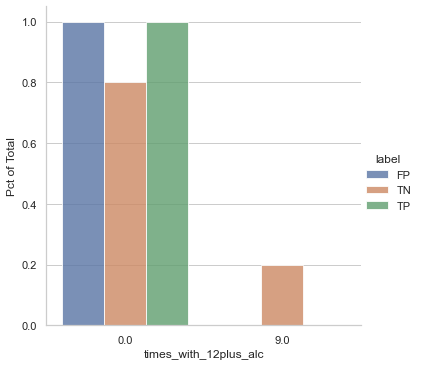

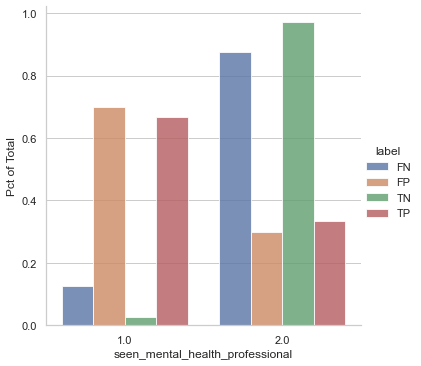

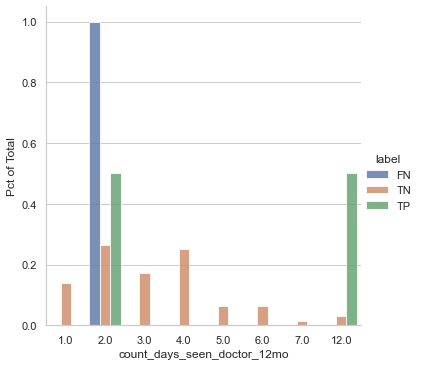

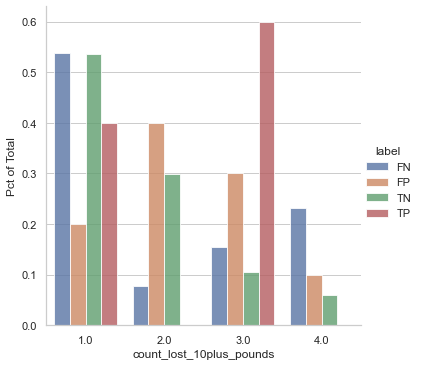

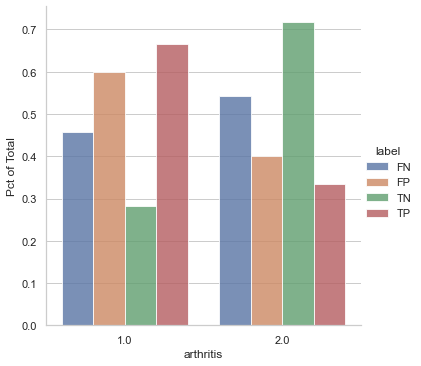

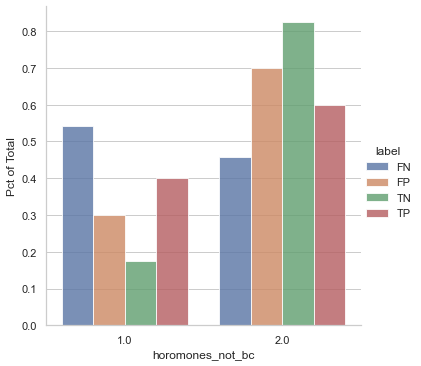

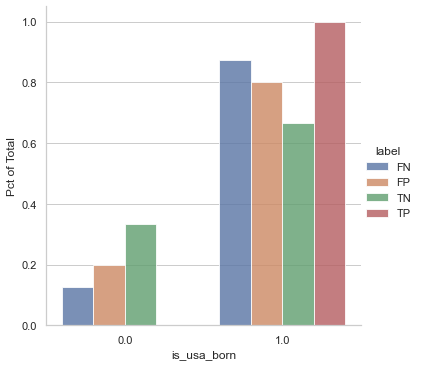

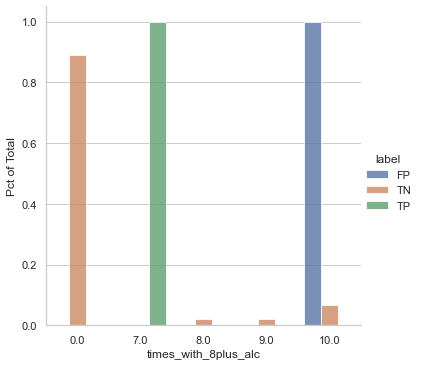

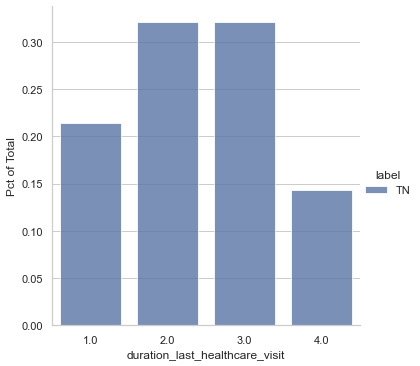

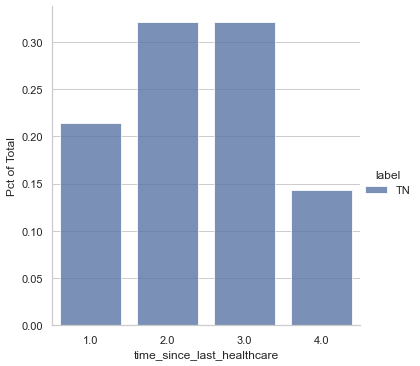

In [38]:
create_error_plots(
    prediction_data = pred_data_bnb,
    columns_to_plot = baseline_cols
)

We subsequently plot the overall distribution average across each feature column. We contextualize the column by adding a column from the eda (corr_abs) & create a feature importance from the random forest model. 

In [39]:
## ##########################
## stats by prediction label

# aggregate features by label
pred_data_bnb_summary = pred_data_bnb.groupby(['label']).mean().round(2).reset_index()

# order columns 
pred_data_bnb_summary['label'] = pd.Categorical(
    pred_data_bnb_summary['label'], 
    categories=["TP","FP","TN","FN"],
    ordered=True
)
pred_data_bnb_summary.sort_values('label', inplace=True)

# transpose so each row is a feature
pred_data_bnb_summary = pred_data_bnb_summary.T.reset_index()

## ##########################
## merge column correlation & feature importance 

dep_screener_univariate = univariate_summary[univariate_summary['feature'].isin(baseline_cols)]
dep_screener_univariate = dep_screener_univariate[['feature','corr_abs']]
pred_data_bnb_summary = pred_data_bnb_summary.merge(
    dep_screener_univariate, 
    left_on='index', 
    right_on='feature', 
    how = 'left'
)

# fit random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# Get numerical feature importances
importances = list(rf.feature_importances_)
feature_importances = pd.DataFrame({'Feature': baseline_cols,'Feature Importance (RF)': importances})
feature_importances = feature_importances.sort_values('Feature Importance (RF)',ascending=False)
pred_data_bnb_summary = pred_data_bnb_summary.merge(
    feature_importances, 
    left_on='index', 
    right_on='Feature', 
    how = 'left'
)


## ##########################
## sanitize

# drop duplicate column
pred_data_bnb_summary.drop(columns=['feature','Feature'], inplace=True)

## remove unneeded rows
pred_data_bnb_summary = pred_data_bnb_summary[~pred_data_bnb_summary['index'] \
                                              .isin(['y_actual','y_pred','label'])]

# # order by feature importance
pred_data_bnb_summary = pred_data_bnb_summary.sort_values(by='corr_abs',ascending=False)
pred_data_bnb_summary = pred_data_bnb_summary.rename(columns={"index": "Feature", 
                                  3: "TP",
                                  1:"FP",
                                  2:"TN",
                                  0:"FN"})

pred_data_bnb_summary.merge(
    univariate_summary[['feature','pct_null']],
    left_on='Feature',
    right_on='feature'
).sort_values(by='Feature Importance (RF)',ascending=False)

,Feature,TP,FP,TN,FN,corr_abs,Feature Importance (RF),feature,pct_null
3,count_lost_10plus_pounds,2.2,2.3,1.69,2.08,0.113423,0.226111,count_lost_10plus_pounds,0.580221
1,seen_mental_health_professional,1.33,1.3,1.97,1.88,0.145780,0.190246,seen_mental_health_professional,0.000299
2,count_days_seen_doctor_12mo,7.0,NaN,3.36,2.0,0.132099,0.158837,count_days_seen_doctor_12mo,0.908874
4,arthritis,1.33,1.4,1.72,1.54,0.112665,0.138182,arthritis,0.003287
5,horomones_not_bc,1.6,1.7,1.83,1.46,0.112026,0.111582,horomones_not_bc,0.003884
6,is_usa_born,1.0,0.8,0.67,0.88,0.100130,0.097468,is_usa_born,0.000598
7,times_with_8plus_alc,7.0,10.0,1.02,NaN,0.096997,0.048685,times_with_8plus_alc,0.914252
8,duration_last_healthcare_visit,NaN,NaN,2.39,NaN,0.095592,0.013562,duration_last_healthcare_visit,0.952794
9,time_since_last_healthcare,NaN,NaN,2.39,NaN,0.095592,0.013156,time_since_last_healthcare,0.952794
0,times_with_12plus_alc,0.0,0.0,1.8,NaN,0.148559,0.002172,times_with_12plus_alc,0.985659


# 4) Feature Selection

- **Part (1):** Explore variables by theme separately. The objective here is to build an intuition of the general predictive power of the different features. They will help contextualize performance of models that use features across multiple themes.

- **Part (2):** Explore baseline model (depression screener questions) in addition to a specific theme. The approach here is to methodically add a single theme on top of the baseline. This will help us further understand which combination of features will help supplement the screener questions. 

- **Part (3):** Explore adding features across **multiple** themes in addition to the baseline features. We ultimately anticipate this will be the most impactful model as it can account for heterogeneity across several aspects of an individual. Adding every single feature into a model will likely make the model biased towards the training dataset. To account for that we will explore adding in the top X additional features. We will model predicitng the top X additional features in two methods
 - Method 1: of the remaining features, sort based on their correlation strength to the outcome variable. This should generally help prioritize adding the next most predictive features.
 - Method 2: we will use the same approach as method 1 by finding the correlation strength to the target, but subset the data beforehand. Based on the error analysis, we found that the model performed poorly when the depression screeners were all reported low (i.e 0s & 1s). Hence, we will calculate the correlation strength among observations that had low depression screener responses.
 
The feature themes are defined in the code block below. We also show the feature within each theme that is most correlated to the target

In [40]:
feature_themes = [
    'dep_screener',
    'hospital_utilization_n_access',
    'alcohol_n_smoking',
    'reproductive_health',
    'med_condition',
    'lifestyle',
    'demographic',
    'socioeconomic'
]

univariate_summary.groupby('feature_theme') \
    .first() \
    .reset_index() \
    .sort_values(by = 'corr_abs', ascending=False)

,feature_theme,feature,corr,corr_abs,std,min,max,unique_values,target,max_minus_min,num_nulls,pct_null
0,alcohol_n_smoking,times_with_12plus_alc,-0.148559,0.148559,0.025166,0.088235,0.088235,8,MDD,0.000000,3299,0.985659
3,hospital_utilization_n_access,seen_mental_health_professional,-0.145780,0.145780,0.097117,0.030539,0.167883,2,MDD,0.137344,1,0.000299
4,lifestyle,count_lost_10plus_pounds,0.113423,0.113423,0.041852,0.029639,0.117241,4,MDD,0.087602,1942,0.580221
5,med_condition,arthritis,-0.112665,0.112665,0.033286,0.023102,0.070175,2,MDD,0.047073,11,0.003287
6,reproductive_health,horomones_not_bc,-0.112026,0.112026,0.039256,0.026335,0.081851,2,MDD,0.055516,13,0.003884
1,demographic,is_usa_born,0.100130,0.100130,0.028013,0.009821,0.049438,2,MDD,0.039617,2,0.000598
7,socioeconomic,work_schedule,0.093788,0.093788,0.018668,0.011765,0.053435,4,MDD,0.041670,2531,0.756200
2,dep_screener,feeling_down_depressed_hopeless,0.040795,0.040795,0.041947,0.035018,0.094340,4,MDD,0.059321,0,0.000000


## Part 1

Measure model performance when using only a single group of features by theme.

In [41]:
# dataframe to store performance across models
perf_by_theme = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'theme'
])

# build a model across each theme
for theme in feature_themes:
    feature_columns = list(univariate_summary[univariate_summary['feature_theme'] == theme]['feature'])
    
    x_train, x_test, y_train, y_test = get_model_data_v2(
        original_df = cdc_survey_pmom,
        columns = feature_columns
    )

    perf_test_theme, predictions, perf_train_theme = generate_models(
        x_train, 
        y_train, 
        x_test, 
        y_test
    )

    perf_test_theme['theme'] = theme
    perf_by_theme = pd.concat([perf_by_theme, perf_test_theme])     

In [42]:
def create_alt_plot_theme(dataset, x_col, x_name, y_col, y_name):
    chart = alt.Chart(dataset).mark_bar().encode(
        x = alt.X(x_col, title=x_name, axis=alt.Axis(labelAngle=-45)),
        y = alt.Y(y_col, title=y_name, scale=alt.Scale(domain=[0, 1])),
        color='theme:N',
    ).facet(
        facet=alt.Facet('model')
    )
    
    return chart

In [50]:
perf_by_theme[perf_by_theme['grouping'] == 'Macro Avg'][['model','recall','f1-score','precision','theme']] \
      .groupby(['theme']) \
      .first() \
      .reset_index() \
      .sort_values(by='f1-score') \
      .rename(columns={'theme':'model features','model':'best_model'})

,model features,best_model,recall,f1-score,precision
2,dep_screener,Bernoulli Naive Bayes,0.500000,0.488550,0.477612
4,lifestyle,Gaussian Naive Bayes,0.537240,0.519484,0.518435
0,alcohol_n_smoking,Decision Tree,0.521615,0.525925,0.537384
6,reproductive_health,Gradient Boosting Classifier,0.522396,0.527250,0.541093
5,med_condition,Logistic Regression,0.525521,0.532981,0.562057
7,socioeconomic,Knn,0.526302,0.534539,0.569665
3,hospital_utilization_n_access,Random Forest,0.541406,0.553521,0.586564
1,demographic,Gaussian Naive Bayes,0.553385,0.561752,0.575207


In [51]:
perf_by_theme[perf_by_theme['grouping'] == 'Depressed (Yes)'][['model','recall','f1-score','precision','theme']] \
      .groupby(['theme']) \
      .first() \
      .reset_index() \
      .sort_values(by='f1-score') \
      .rename(columns={'theme':'model features','model':'best_model'})

,model features,best_model,recall,f1-score,precision
2,dep_screener,Gaussian Naive Bayes,1.000000,0.086831,0.045386
0,alcohol_n_smoking,Gaussian Naive Bayes,0.966667,0.090343,0.047386
7,socioeconomic,Gaussian Naive Bayes,0.200000,0.099174,0.065934
6,reproductive_health,Decision Tree,0.200000,0.109091,0.075000
4,lifestyle,Decision Tree,0.200000,0.113208,0.078947
5,med_condition,Gaussian Naive Bayes,0.400000,0.133333,0.080000
3,hospital_utilization_n_access,Random Forest,0.100000,0.136364,0.214286
1,demographic,Gaussian Naive Bayes,0.133333,0.156863,0.190476


In [52]:
perf_by_theme[perf_by_theme['grouping'] == 'Depressed (No)'][['model','recall','f1-score','precision','theme']] \
      .groupby(['theme']) \
      .first() \
      .reset_index() \
      .sort_values(by='f1-score') \
      .rename(columns={'theme':'model features','model':'best_model'})

,model features,best_model,recall,f1-score,precision
0,alcohol_n_smoking,Logistic Regression,1.0,0.977099,0.955224
1,demographic,Bernoulli Naive Bayes,1.0,0.977099,0.955224
2,dep_screener,Knn,1.0,0.977099,0.955224
3,hospital_utilization_n_access,Bernoulli Naive Bayes,1.0,0.977099,0.955224
4,lifestyle,Bernoulli Naive Bayes,1.0,0.977099,0.955224
5,med_condition,Bernoulli Naive Bayes,1.0,0.977099,0.955224
6,reproductive_health,Bernoulli Naive Bayes,1.0,0.977099,0.955224
7,socioeconomic,Bernoulli Naive Bayes,1.0,0.977099,0.955224


For completeness we display the performance by theme by model to see if a specific model disproportionately does better for a theme. We see the naive bayes models do best for the top 3 themes. The performance is relatively identical across themes among the other models.

In [53]:
by_theme_recall = create_alt_plot_theme(
    dataset = perf_by_theme[perf_by_theme['grouping'] == 'Macro Avg'],
    x_col = 'theme',
    x_name = 'theme',
    y_col = 'recall',
    y_name = 'recall'
)

by_theme_f1 = create_alt_plot_theme(
    dataset = perf_by_theme[perf_by_theme['grouping'] == 'Macro Avg'],
    x_col = 'theme',
    x_name = 'theme',
    y_col = 'f1-score',
    y_name = 'F1 Score'
) 

In [54]:
by_theme_recall  

alt.FacetChart(...)

In [55]:
by_theme_f1

alt.FacetChart(...)

## Part 2

We subsequently plot the model performance when adding a group of columns. Given some themes have more column, we take the top 20 values per theme to remove any variance caused by some themes having substantially more features.

In [56]:
baseline_cols

['times_with_12plus_alc',
 'seen_mental_health_professional',
 'count_days_seen_doctor_12mo',
 'count_lost_10plus_pounds',
 'arthritis',
 'horomones_not_bc',
 'is_usa_born',
 'times_with_8plus_alc',
 'duration_last_healthcare_visit',
 'time_since_last_healthcare']

In [134]:
# list(univariate_summary[
#     (univariate_summary['feature_theme'] == feature_themes[0]) & 
#     (~univariate_summary['feature'].isin(baseline_cols))
# ].iloc[:20,:]['feature'])

baseline_cols

['times_with_12plus_alc',
 'seen_mental_health_professional',
 'count_days_seen_doctor_12mo',
 'count_lost_10plus_pounds',
 'arthritis',
 'horomones_not_bc',
 'is_usa_born',
 'times_with_8plus_alc',
 'time_since_last_healthcare',
 'work_schedule']

In [135]:
# dataframe to store results.
perf_by_theme_inc = pd.DataFrame(columns = [
    'model',
    'grouping',
    'precision',
    'recall',
    'f1-score',
    'support',
    'accuracy',
    'theme'
])

for theme in feature_themes:
    
    # find top 20 features for that theme
    top_additional_candidates = list(univariate_summary[
        (univariate_summary['feature_theme'] == theme) & 
        (~univariate_summary['feature'].isin(baseline_cols))
    ].iloc[:20,:]['feature'])
    
    x_train, x_test, y_train, y_test = get_model_data_v2(
        original_df = cdc_survey_pmom,
        columns = baseline_cols + top_additional_candidates
    )

    baseline_model, predictions, performance_train = generate_models(
        x_train, 
        y_train, 
        x_test, 
        y_test
    )

    baseline_model['theme'] = theme
    perf_by_theme_inc = pd.concat([perf_by_theme_inc, baseline_model])
    
# add in baseline to give context to incr benefit
#best_baseline = perf_test_baseline[perf_test_baseline['model'] == "Random Forest"]
#best_baseline['theme'] = 'Baseline'
#perf_by_theme_inc = pd.concat([perf_by_theme_inc, best_baseline])


# define description
def create_theme_col_desc(value):
    if value in 'Baseline':
        return 'Baseline'
    elif value in 'dep_screener':
        return 'Baseline + dep_screener'
    elif value in 'alcohol_n_smoking':
        return 'Baseline + alcohol_n_smoking'
    elif value in 'med_condition':
        return 'Baseline + med_condition'
    elif value in 'lifestyle':
        return 'Baseline + lifestyle'
    elif value in 'hospital_utilization_n_access':
        return 'Baseline + hospital_utilization_n_access'
    elif value in 'socioeconomic':
        return 'Baseline + socioeconomic'
    elif value in 'reproductive_health':
        return 'Baseline + reproductive_health'
    elif value in 'demographic':
        return 'Baseline + demographic' 

perf_by_theme_inc['theme_desc'] = perf_by_theme_inc['theme'].map(create_theme_col_desc)

In [135]:
# theme

In [134]:
# x_train, x_test, y_train, y_test = get_model_data(
#     original_df = cdc_survey_pmom,
#     columns = baseline_cols + top_additional_candidates
# )

# baseline_model, predictions, performance_train = generate_models(
#     x_train, 
#     y_train, 
#     x_test, 
#     y_test
# )

# baseline_model[baseline_model['grouping'] == "Depressed (Yes)"]

We display a similar table showing the best model across each combination of matrix features. "+ {{feature theme}}" means that model includes the baseline plus the top 20 features from that theme. There are 3 themes that improve performance on top of the baseline. Interestingly, demographic features as a standalone do not perform well, but they are a useful incremental theme on top of the baseline. 


In terms of performance, the improvement is in recall rather than precision. This is good as its our primary objective, but highlights there is still a lot of heterogeneity across the positive class. The hypothesis is the additional features help identify edge cases, but it is still somewhat random across those within the positive class.

For our next section when we add features across multiple themes, we'd expect these top 3 performing themes to have slightly higher representation.

In [59]:
perf_by_theme_inc = perf_by_theme_inc.sort_values(by='f1-score', ascending=False)

perf_by_theme_inc[perf_by_theme_inc['grouping'] == 'Macro Avg'][['model','recall','f1-score','precision','theme_desc']] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='f1-score') \
      .rename(columns={'theme_desc':'model features','model':'best_model'})

,model features,best_model,recall,f1-score,precision
4,+ lifestyle,Logistic Regression,0.553385,0.561752,0.575207
5,+ med_condition,Gradient Boosting Classifier,0.566146,0.569403,0.573152
2,+ dep_screener,Random Forest,0.597917,0.596380,0.594906
1,+ demographic,Gradient Boosting Classifier,0.611458,0.601589,0.593761
0,+ alcohol_n_smoking,Gradient Boosting Classifier,0.589063,0.605271,0.631538
7,+ socioeconomic,Gradient Boosting Classifier,0.616146,0.616146,0.616146
6,+ reproductive_health,Gradient Boosting Classifier,0.604167,0.616924,0.634400
8,Baseline,Random Forest,0.592187,0.617297,0.669151
3,+ hospital_utilization_n_access,Gradient Boosting Classifier,0.616927,0.618809,0.620770


In [60]:
perf_by_theme_inc[perf_by_theme_inc['grouping'] == 'Depressed (Yes)'][['model','recall','f1-score','precision','theme_desc']] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='f1-score') \
      .rename(columns={'theme_desc':'model features','model':'best_model'})

,model features,best_model,recall,f1-score,precision
4,+ lifestyle,Logistic Regression,0.133333,0.156863,0.190476
5,+ med_condition,Gradient Boosting Classifier,0.166667,0.175439,0.185185
2,+ dep_screener,Random Forest,0.233333,0.229508,0.225806
0,+ alcohol_n_smoking,Gradient Boosting Classifier,0.200000,0.240000,0.300000
1,+ demographic,Gradient Boosting Classifier,0.266667,0.242424,0.222222
8,Baseline,Random Forest,0.200000,0.260870,0.375000
6,+ reproductive_health,Gradient Boosting Classifier,0.233333,0.264151,0.304348
7,+ socioeconomic,Gradient Boosting Classifier,0.266667,0.266667,0.266667
3,+ hospital_utilization_n_access,Gradient Boosting Classifier,0.266667,0.271186,0.275862


## Part 3

Here we explore adding features across multiple themes. We have two primary methods as defined in the intro to this section. For method 2, when we subset to observations with low depression screener we attempt two frameworks. The first is by subseting the records that have 0s across the 3 most important features in the baseline model. The second subsets to records where the baseline model has low confidence in the probability of MDD=1 (part 2 of error analysis section).

In [61]:
cdc_survey_pmom.groupby('arthritis') \
    .agg({'MDD':'mean','SEQN':'count'}) \
    .reset_index()

,arthritis,MDD,SEQN
0,1.0,0.070175,912
1,2.0,0.023102,2424


In [62]:
cdc_survey_pmom.groupby('seen_mental_health_professional') \
    .agg({'MDD':'mean','SEQN':'count'}) \
    .reset_index()

,seen_mental_health_professional,MDD,SEQN
0,1.0,0.167883,137
1,2.0,0.030539,3209


Fallback options
- count_lost_10plus_pounds <= 2
- count_days_seen_doctor_12mo <= 10
- seen_mental_health_professional = 1
- arthritis = 2 

In [63]:
def get_random_forest_n_top_features(original_df, 
                                     feature_columns):
    """
    A model that trains a random forest model and returns the feature importances as a dataframe.
    The index of the row corresponds to the column index in the initial array
    """
    
    x_train, x_test, y_train, y_test, idx_train, idx_test = get_model_data_v2(
        original_df = original_df,
        columns = candidate_features,
        return_indices = True
    )
    
    # fit random forest and print accuracy
    rf = RandomForestClassifier(random_state=42)
    rf.fit(x_train, y_train)
   
    # list feature importances
    # Get numerical feature importances
    importances = list(rf.feature_importances_)
    feature_importances = pd.DataFrame({'feature': feature_columns,'rf_coefficient': importances})
    feature_importances = feature_importances.sort_values('rf_coefficient',ascending=False)
    
    return feature_importances

def get_feature_importances(original_df,
                            univariate_df,
                            feature_columns):
    
    rf_feature_importances = get_random_forest_n_top_features(
        original_df = cdc_survey_pmom,
        feature_columns = feature_columns
    )

    #
    feature_importances = rf_feature_importances.merge(
        univariate_df[['feature','corr_abs']],
        left_on='feature',
        right_on='feature'
    )

    feature_importances['rf_corr_avg'] = (feature_importances['rf_coefficient'] + feature_importances['corr_abs']) / 2
    feature_importances['rf_corr_product'] = (feature_importances['rf_coefficient'] * feature_importances['corr_abs'])
    feature_importances.sort_values(by='rf_corr_avg',ascending=False,inplace=True)

    return feature_importances

In [64]:
feat_imp = get_feature_importances(
    original_df = cdc_survey_pmom,
    univariate_df = univariate_summary,
    feature_columns = candidate_features
)

feat_imp.iloc[:10,:]

,feature,rf_coefficient,corr_abs,rf_corr_avg,rf_corr_product
6,seen_mental_health_professional,0.024961,0.145780,0.085371,0.003639
114,times_with_12plus_alc,0.000000,0.148559,0.074280,0.000000
31,count_days_seen_doctor_12mo,0.011970,0.132099,0.072035,0.001581
2,age_in_years,0.038410,0.091730,0.065070,0.003523
17,count_lost_10plus_pounds,0.015790,0.113423,0.064607,0.001791
24,horomones_not_bc,0.013900,0.112026,0.062963,0.001557
30,arthritis,0.012253,0.112665,0.062459,0.001380
5,count_minutes_moderate_sedentary_activity,0.029651,0.084147,0.056899,0.002495
33,is_usa_born,0.010120,0.100130,0.055125,0.001013
1,weight_lbs,0.042410,0.063901,0.053155,0.002710


In [65]:
def create_candidate_feature_matrix(df_to_use, df_feat_imp,features):

    cor_columns = features.copy()
    cor_columns.append('MDD')

    ## ##########################
    ## Create correlation values for each method
    df_to_use['num_dep_screener_above0'] = (df_to_use[dep_screener_cols]>0).sum(axis=1)    

    # Option 1: corr to MDD
    correlation_matrix_option1 = df_to_use[cor_columns].corr(method='pearson')
    correlation_values_abs_option1 = abs(correlation_matrix_option1['MDD']).sort_values(ascending=False)
    
    # Option 2: 
    df_to_use_subset2 = df_to_use[df_to_use['count_lost_10plus_pounds'] <= 2]
    correlation_matrix_option2 = df_to_use_subset2[cor_columns].corr(method='pearson')
    correlation_values_abs_option2 = abs(correlation_matrix_option2['MDD']).sort_values(ascending=False)   
    
    # Option 3: 
    df_to_use_subset3 = df_to_use[df_to_use['count_days_seen_doctor_12mo'] <= 10]
    correlation_matrix_option3 = df_to_use_subset3[cor_columns].corr(method='pearson')
    correlation_values_abs_option3 = abs(correlation_matrix_option3['MDD']).sort_values(ascending=False)   
    
    # Option 4: 
    df_to_use_subset4 = df_to_use[df_to_use['seen_mental_health_professional'] == 1]
    correlation_matrix_option4 = df_to_use_subset4[cor_columns].corr(method='pearson')
    correlation_values_abs_option4 = abs(correlation_matrix_option4['MDD']).sort_values(ascending=False)   
    
    # Option 5: 
    df_to_use_subset5 = df_to_use[df_to_use['arthritis'] == 2]
    correlation_matrix_option5 = df_to_use_subset5[cor_columns].corr(method='pearson')
    correlation_values_abs_option5 = abs(correlation_matrix_option5['MDD']).sort_values(ascending=False)      
    
    
    ## ##########################
    ## merge into one dataframe

    candidate_features_matrix = pd.DataFrame(cor_columns).rename(columns={0:'feature'})

    # add option 1 
    option1 = pd.DataFrame(correlation_values_abs_option1).reset_index()
    option1.columns = ['feature','corr_to_mdd']

    # add option 2
    option2 = pd.DataFrame(correlation_values_abs_option2).reset_index()
    option2.columns = ['feature','count_lost_10plus_pounds']

    # add option 3
    option3 = pd.DataFrame(correlation_values_abs_option3).reset_index()
    option3.columns = ['feature','count_days_seen_doctor_12mo']
    
    # add option 4
    option4 = pd.DataFrame(correlation_values_abs_option4).reset_index()
    option4.columns = ['feature','seen_mental_health_professional']
    
    # add option 5
    option5 = pd.DataFrame(correlation_values_abs_option5).reset_index()
    option5.columns = ['feature','arthritis']
      

    # merge together
    candidate_features_matrix = candidate_features_matrix.merge(option1, left_on='feature', right_on='feature', how='left')
    candidate_features_matrix = candidate_features_matrix.merge(option2, left_on='feature', right_on='feature', how='left')
    candidate_features_matrix = candidate_features_matrix.merge(option3, left_on='feature', right_on='feature', how='left')
    candidate_features_matrix = candidate_features_matrix.merge(option4, left_on='feature', right_on='feature', how='left')
    candidate_features_matrix = candidate_features_matrix.merge(option5, left_on='feature', right_on='feature', how='left')

    # remove dep screener & MDD
    candidate_features_matrix = candidate_features_matrix[~candidate_features_matrix['feature'] \
                        .isin(dep_screener_cols + ['MDD'])]
    
    ## Add based on feat importances
    candidate_features_matrix = candidate_features_matrix.merge(
        df_feat_imp,
        left_on='feature',
        right_on='feature',
        how='left'
    )

    return candidate_features_matrix

candidate_features_matrix = create_candidate_feature_matrix(
    df_to_use = cdc_survey_pmom, 
    df_feat_imp = feat_imp,
    features = candidate_features
)

We've created a table that lists all the features excluding the depresssion screener & MDD column. We calculated 3 correlation values based on the 3 options. We will use this table to find the top X features by method. A sample is shown below.

In [66]:
candidate_features_matrix.columns

Index(['feature', 'corr_to_mdd', 'count_lost_10plus_pounds',
       'count_days_seen_doctor_12mo', 'seen_mental_health_professional',
       'arthritis', 'rf_coefficient', 'corr_abs', 'rf_corr_avg',
       'rf_corr_product'],
      dtype='object')

In [67]:
candidate_features_matrix.shape

(105, 10)

In [68]:
candidate_features_matrix[candidate_features_matrix.feature.isin(baseline_cols)]

,feature,corr_to_mdd,count_lost_10plus_pounds,count_days_seen_doctor_12mo,seen_mental_health_professional,arthritis,rf_coefficient,corr_abs,rf_corr_avg,rf_corr_product
6,times_with_8plus_alc,0.096997,0.141406,NaN,0.190256,0.018978,0.004501,0.096997,0.050749,0.000437
7,times_with_12plus_alc,0.148559,0.125846,NaN,NaN,0.098417,0.000000,0.148559,0.074280,0.000000
16,arthritis,0.112665,0.108814,0.159793,0.184842,NaN,0.012253,0.112665,0.062459,0.001380
50,time_since_last_healthcare,0.095592,NaN,NaN,0.866025,0.106834,0.000222,0.095592,0.047907,0.000021
52,seen_mental_health_professional,0.145780,0.130738,0.187440,NaN,0.127527,0.024961,0.145780,0.085371,0.003639
53,count_days_seen_doctor_12mo,0.132099,0.176122,0.021401,0.334367,0.017130,0.011970,0.132099,0.072035,0.001581
54,duration_last_healthcare_visit,0.095592,NaN,NaN,0.866025,0.106834,0.000620,0.095592,0.048106,0.000059
66,count_lost_10plus_pounds,0.113423,0.016612,0.107917,0.105883,0.134841,0.015790,0.113423,0.064607,0.001791
96,horomones_not_bc,0.112026,0.110185,0.022793,0.123049,0.113160,0.013900,0.112026,0.062963,0.001557
104,is_usa_born,0.100130,0.067936,0.089214,0.102886,0.093045,0.010120,0.100130,0.055125,0.001013


In [69]:
candidate_features_matrix.sort_values(by='corr_to_mdd',ascending=False).iloc[:3,:]

,feature,corr_to_mdd,count_lost_10plus_pounds,count_days_seen_doctor_12mo,seen_mental_health_professional,arthritis,rf_coefficient,corr_abs,rf_corr_avg,rf_corr_product
7,times_with_12plus_alc,0.148559,0.125846,NaN,NaN,0.098417,0.000000,0.148559,0.074280,0.000000
52,seen_mental_health_professional,0.145780,0.130738,0.187440,NaN,0.127527,0.024961,0.145780,0.085371,0.003639
53,count_days_seen_doctor_12mo,0.132099,0.176122,0.021401,0.334367,0.017130,0.011970,0.132099,0.072035,0.001581


In [70]:
def get_additional_features(
    additional_col_method, 
    n_features,
    feature_matrix):

    features = feature_matrix.sort_values(
                    by = additional_col_method, ascending=False
               ).iloc[:n_features,]
    features = features[~features[additional_col_method].isna()]['feature']
    return list(features)


def test_adding_new_features(
    df_to_use,
    candidate_features_matrix_to_use, 
    additional_col_methods_to_test = [
        'corr_to_mdd',
        'count_lost_10plus_pounds',
        'count_days_seen_doctor_12mo',
        'seen_mental_health_professional',
        'arthritis',
        'rf_coefficient',
        'rf_corr_avg',
        'rf_corr_product'
    ]
):
    
    # dataframe to store results
    perf_by_additional_n_cols_matrix = pd.DataFrame(columns = [
        'model',
        'grouping',
        'precision',
        'recall',
        'f1-score',
        'support',
        'accuracy',
        'addl_cols',
        'tot_cols',
        'additional_col_method'
    ])

    # for each method we explore adding the top X features ranging from top 1 until top 30. 
    for additional_col_method in additional_col_methods_to_test:

        print(f"Doing {additional_col_method}...")

        # add next top X columns 
        # try top 1 until top 30
        for i in range(1,31,1):

            # if i=1 this will add 1 column to model. 
            # additional_col_method defines how we define the top 1,2, etc... columns
            features_to_use = get_additional_features(
                additional_col_method = additional_col_method, 
                n_features = i,
                feature_matrix = candidate_features_matrix_to_use
            )

            x_train, x_test, y_train, y_test = get_model_data_v2(
                original_df = df_to_use,
                columns = features_to_use
                #columns = baseline_cols + features_to_use
            )

            perf_test, predictions, perf_train = generate_models(
                x_train, 
                y_train, 
                x_test, 
                y_test
            )

            perf_test['addl_cols'] = i
            perf_test['tot_cols'] = x_train.shape[1]
            perf_test['additional_col_method'] = additional_col_method

            perf_by_additional_n_cols_matrix = pd.concat([perf_by_additional_n_cols_matrix, perf_test])
    
    return perf_by_additional_n_cols_matrix

In [71]:
perf_by_additional_n_cols_matrix_v1 = test_adding_new_features(
    df_to_use = cdc_survey_pmom,
    candidate_features_matrix_to_use = candidate_features_matrix
)

Doing corr_to_mdd...
Doing count_lost_10plus_pounds...
Doing count_days_seen_doctor_12mo...
Doing seen_mental_health_professional...
Doing arthritis...
Doing rf_coefficient...
Doing rf_corr_avg...
Doing rf_corr_product...


In the table below we identify the best model across each method. We see that the method 3 where we subset to cases with 9+ dep screener values being 0 performs the best. This makes sense as the error analaysis showed that was specifically the area the baseline model did bad at. 

In [72]:
perf_by_additional_n_cols_matrix_v1 = perf_by_additional_n_cols_matrix_v1.sort_values(by = 'f1-score', ascending=False)

perf_by_additional_n_cols_matrix_v1[
    perf_by_additional_n_cols_matrix_v1['grouping'] == "Macro Avg"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'f1-score', ascending=False) \
.rename(columns={'model':'best_model'})

,additional_col_method,best_model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols
1,corr_to_mdd,Gradient Boosting Classifier,Macro Avg,0.638792,0.634375,0.636539,670.0,0.938806,12,12
6,rf_corr_product,Knn,Macro Avg,0.669151,0.592187,0.617297,670.0,0.949254,2,2
5,rf_corr_avg,Gradient Boosting Classifier,Macro Avg,0.634400,0.604167,0.616924,670.0,0.941791,4,4
0,arthritis,Random Forest,Macro Avg,0.622171,0.602604,0.611319,670.0,0.938806,18,18
2,count_days_seen_doctor_12mo,Gaussian Naive Bayes,Macro Avg,0.582490,0.687240,0.605607,670.0,0.888060,9,9
3,count_lost_10plus_pounds,Gradient Boosting Classifier,Macro Avg,0.601395,0.585156,0.592359,670.0,0.935821,30,30
4,rf_coefficient,Gaussian Naive Bayes,Macro Avg,0.565547,0.626823,0.581467,670.0,0.894030,11,11
7,seen_mental_health_professional,Random Forest,Macro Avg,0.553856,0.548698,0.551080,670.0,0.926866,24,24


In [73]:
perf_by_additional_n_cols_matrix_v1[
    perf_by_additional_n_cols_matrix_v1['grouping'] == "Depressed (Yes)"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'f1-score', ascending=False) \
.rename(columns={'model':'best_model'})

,additional_col_method,best_model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols
1,corr_to_mdd,Gradient Boosting Classifier,Depressed (Yes),0.310345,0.300000,0.305085,30.0,0.938806,12,12
2,count_days_seen_doctor_12mo,Gaussian Naive Bayes,Depressed (Yes),0.191781,0.466667,0.271845,30.0,0.888060,9,9
5,rf_corr_avg,Gradient Boosting Classifier,Depressed (Yes),0.304348,0.233333,0.264151,30.0,0.941791,4,4
6,rf_corr_product,Knn,Depressed (Yes),0.375000,0.200000,0.260870,30.0,0.949254,2,2
0,arthritis,Random Forest,Depressed (Yes),0.280000,0.233333,0.254545,30.0,0.938806,18,18
4,rf_coefficient,Gaussian Naive Bayes,Depressed (Yes),0.153846,0.466667,0.231405,30.0,0.861194,18,18
3,count_lost_10plus_pounds,Gradient Boosting Classifier,Depressed (Yes),0.186047,0.266667,0.219178,30.0,0.914925,16,16
7,seen_mental_health_professional,Decision Tree,Depressed (Yes),0.101266,0.266667,0.146789,30.0,0.861194,17,17


In [74]:
perf_by_additional_n_cols_matrix_v1[
    perf_by_additional_n_cols_matrix_v1['grouping'] == "Depressed (No)"
].groupby(['additional_col_method']) \
.first() \
.reset_index() \
.sort_values(by = 'f1-score', ascending=False) \
.rename(columns={'model':'best_model'})

,additional_col_method,best_model,grouping,precision,recall,f1-score,support,accuracy,addl_cols,tot_cols
2,count_days_seen_doctor_12mo,Knn,Depressed (No),0.956652,1.0,0.977846,640.0,0.956716,11,11
0,arthritis,Bernoulli Naive Bayes,Depressed (No),0.955224,1.0,0.977099,640.0,0.955224,19,19
1,corr_to_mdd,Gradient Boosting Classifier,Depressed (No),0.955224,1.0,0.977099,640.0,0.955224,1,1
3,count_lost_10plus_pounds,Bernoulli Naive Bayes,Depressed (No),0.955224,1.0,0.977099,640.0,0.955224,5,5
4,rf_coefficient,Bernoulli Naive Bayes,Depressed (No),0.955224,1.0,0.977099,640.0,0.955224,6,6
5,rf_corr_avg,Logistic Regression,Depressed (No),0.955224,1.0,0.977099,640.0,0.955224,2,2
6,rf_corr_product,Bernoulli Naive Bayes,Depressed (No),0.955224,1.0,0.977099,640.0,0.955224,6,6
7,seen_mental_health_professional,Logistic Regression,Depressed (No),0.955224,1.0,0.977099,640.0,0.955224,2,2


## Build Best Options

In [139]:
baseline_cols

['times_with_12plus_alc',
 'seen_mental_health_professional',
 'count_days_seen_doctor_12mo',
 'count_lost_10plus_pounds',
 'arthritis',
 'horomones_not_bc',
 'is_usa_born',
 'times_with_8plus_alc',
 'time_since_last_healthcare',
 'work_schedule']

In [77]:
best_features_v1

['times_with_12plus_alc',
 'seen_mental_health_professional',
 'count_days_seen_doctor_12mo',
 'count_lost_10plus_pounds',
 'arthritis',
 'horomones_not_bc',
 'is_usa_born',
 'times_with_8plus_alc',
 'time_since_last_healthcare',
 'duration_last_healthcare_visit',
 'work_schedule',
 'age_in_years']

In [122]:
best_features_v1 = get_additional_features(
    additional_col_method = 'corr_to_mdd', 
    n_features = 12,
    feature_matrix = candidate_features_matrix
)

# remove duplicate "duration_since_last_visit"
best_features_v1 = [
    'times_with_12plus_alc',
    'seen_mental_health_professional',
    'count_days_seen_doctor_12mo',
    'count_lost_10plus_pounds',
    'arthritis',
    'horomones_not_bc',
    'is_usa_born',
    'times_with_8plus_alc',
    'time_since_last_healthcare',
    'work_schedule',
    'age_in_years'
]

x_train, x_test, y_train, y_test, idx_train, idx_test = get_model_data_v2(
    original_df = cdc_survey_pmom,
    columns = best_features_v1,
    return_indices = True
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)
gb_score_final = get_performance_df(y_test, gb_pred,'Gradient Boosting Classifier')
gb_score_final

(849, 11)
(670, 11)
(849,)
(670,)


,model,grouping,precision,recall,f1-score,support,accuracy
0,Gradient Boosting Classifier,Depressed (No),0.967239,0.968750,0.967994,640.0,0.938806
1,Gradient Boosting Classifier,Depressed (Yes),0.310345,0.300000,0.305085,30.0,0.938806
2,Gradient Boosting Classifier,Macro Avg,0.638792,0.634375,0.636539,670.0,0.938806
3,Gradient Boosting Classifier,Weighted Avg,0.937826,0.938806,0.938311,670.0,0.938806


In [160]:
### Baseline
baseline = perf_test_baseline[perf_test_baseline['model'] == "Decision Tree"]
baseline['best_model'] = baseline['model']
baseline['model features'] = 'Baseline'
baseline['has_class_imbalance_correction'] = 'No'

### Baseline + class imbalance
baseline_after_class_imbalance = perf_test_baseline_v2[perf_test_baseline_v2['model'] == "Random Forest"]
baseline_after_class_imbalance['model features'] = 'Baseline'
baseline_after_class_imbalance['best_model'] = baseline_after_class_imbalance['model']
baseline_after_class_imbalance['has_class_imbalance_correction'] = 'Yes'

### Add theme by one
perf_by_theme_inc_mdd1 = perf_by_theme_inc[perf_by_theme_inc['grouping'] == 'Depressed (Yes)'][['model','recall','f1-score','precision','theme_desc']] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='f1-score') \
      .rename(columns={'theme_desc':'model features','model':'best_model'})
perf_by_theme_inc_mdd1['has_class_imbalance_correction'] = 'Yes'

perf_by_theme_inc_macro = perf_by_theme_inc[perf_by_theme_inc['grouping'] == 'Macro Avg'][['model','recall','f1-score','precision','theme_desc']] \
      .groupby(['theme_desc']) \
      .first() \
      .reset_index() \
      .sort_values(by='f1-score') \
      .rename(columns={'theme_desc':'model features','model':'best_model'})
perf_by_theme_inc_macro['has_class_imbalance_correction'] = 'Yes'

### Final 
gb_score_final['model features'] = 'Baseline + Age Column'
gb_score_final['best_model'] = gb_score_final['model']
gb_score_final['has_class_imbalance_correction'] = 'Yes'

In [161]:
cols = ['model features','has_class_imbalance_correction','best_model','recall','f1-score','precision']

macro_consol = pd.concat([
    baseline[baseline['grouping']=="Macro Avg"][cols],
    baseline_after_class_imbalance[baseline_after_class_imbalance['grouping']=="Macro Avg"][cols],
    perf_by_theme_inc_macro[cols],
    gb_score_final[gb_score_final['grouping']=="Macro Avg"][cols]
])

mdd1_consol = pd.concat([
    baseline[baseline['grouping']=="Depressed (Yes)"][cols],
    baseline_after_class_imbalance[baseline_after_class_imbalance['grouping']=="Depressed (Yes)"][cols],
    perf_by_theme_inc_macro[cols],
    gb_score_final[gb_score_final['grouping']=="Depressed (Yes)"][cols]
])

In [162]:
macro_consol.sort_values(by='f1-score')

,model features,has_class_imbalance_correction,best_model,recall,f1-score,precision
1,Baseline + demographic,Yes,Gaussian Naive Bayes,0.623177,0.274062,0.526814
5,Baseline + med_condition,Yes,Gaussian Naive Bayes,0.640885,0.316751,0.527016
4,Baseline + lifestyle,Yes,Gaussian Naive Bayes,0.652344,0.348784,0.527363
2,Baseline,No,Decision Tree,0.530990,0.545265,0.678947
0,Baseline + alcohol_n_smoking,Yes,Gradient Boosting Classifier,0.588281,0.602519,0.624367
2,Baseline + dep_screener,Yes,Random Forest,0.601823,0.608645,0.616758
7,Baseline + socioeconomic,Yes,Gradient Boosting Classifier,0.616146,0.616146,0.616146
2,Baseline,Yes,Random Forest,0.605729,0.622903,0.648947
3,Baseline + hospital_utilization_n_access,Yes,Gradient Boosting Classifier,0.618490,0.624373,0.631041
6,Baseline + reproductive_health,Yes,Gradient Boosting Classifier,0.619271,0.627281,0.636765


In [159]:
mdd1_consol.sort_values(by='f1-score')

,model features,has_class_imbalance_correction,best_model,recall,f1-score,precision
1,Baseline (10 top correlated columns),No,Decision Tree,0.066667,0.114286,0.400000
1,Baseline + demographic,Yes,Gaussian Naive Bayes,0.623177,0.274062,0.526814
1,Baseline + class imbalance correction,Yes,Random Forest,0.233333,0.274510,0.333333
1,Baseline + Age Column,Yes,Gradient Boosting Classifier,0.300000,0.305085,0.310345
5,Baseline + med_condition,Yes,Gaussian Naive Bayes,0.640885,0.316751,0.527016
4,Baseline + lifestyle,Yes,Gaussian Naive Bayes,0.652344,0.348784,0.527363
0,Baseline + alcohol_n_smoking,Yes,Gradient Boosting Classifier,0.588281,0.602519,0.624367
2,Baseline + dep_screener,Yes,Random Forest,0.601823,0.608645,0.616758
7,Baseline + socioeconomic,Yes,Gradient Boosting Classifier,0.616146,0.616146,0.616146
3,Baseline + hospital_utilization_n_access,Yes,Gradient Boosting Classifier,0.618490,0.624373,0.631041


In [89]:
#perf_test_baseline_v2[perf_test_baseline_v2['grouping'] == "Depressed (Yes)"].sort_values(by='f1-score')
#perf_test_baseline_v2[perf_test_baseline_v2['grouping'] == "Macro Avg"].sort_values(by='f1-score')